### Importing all the required libraries and Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
df=pd.read_csv("game of thrones.csv")

In [6]:
df

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1
...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,NaN,10.29,7.8
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,28-Apr-19,12.02,7.4
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,5-May-19,11.80,5.4
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,12-May-19,12.48,5.9


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No. overall             73 non-null     int64  
 1   No. in season           73 non-null     int64  
 2   Season                  73 non-null     int64  
 3   Title                   73 non-null     object 
 4   Directed by             73 non-null     object 
 5   Written by              73 non-null     object 
 6   Novel(s) adapted        73 non-null     object 
 7   Original air date       61 non-null     object 
 8   U.S. viewers(millions)  70 non-null     float64
 9   Imdb rating             73 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.8+ KB


In [29]:
df.shape

(73, 10)

### Data Cleaning

In [30]:
df.isnull().sum()

No. overall                0
No. in season              0
Season                     0
Title                      0
Directed by                0
Written by                 0
Novel(s) adapted           0
Original air date         12
U.S. viewers(millions)     3
Imdb rating                0
dtype: int64

In [31]:
df[df['U.S. viewers(millions)'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
26,27,7,3,"""The Bear and the Maiden Fair""",Michelle MacLaren,George R. R. Martin,A Storm of Swords,NaN,NaN,8.7
38,39,9,4,"""The Watchers on the Wall""",Neil Marshall,David Benioff & D. B. Weiss,A Storm of Swords,8-Jun-14,NaN,9.6
55,56,6,6,"""Blood of My Blood""",Jack Bender,Bryan Cogman,Outline from The Winds of Winter and original ...,19-May-16,NaN,8.4


In [32]:
df[df['Original air date'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
6,7,7,1,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,NaN,2.40,9.2
11,12,2,2,"""The Night Lands""",Alan Taylor,David Benioff & D. B. Weiss,A Clash of Kings,NaN,3.76,8.5
12,13,3,2,"""What Is Dead May Never Die""",Alik Sakharov,Bryan Cogman,A Clash of Kings,NaN,3.77,8.8
16,17,7,2,"""A Man Without Honor""",David Nutter,David Benioff & D. B. Weiss,A Clash of Kings,NaN,3.69,8.9
26,27,7,3,"""The Bear and the Maiden Fair""",Michelle MacLaren,George R. R. Martin,A Storm of Swords,NaN,NaN,8.7
36,37,7,4,"""Mockingbird""",Alik Sakharov,David Benioff & D. B. Weiss,A Storm of Swords,NaN,7.20,9.1
46,47,7,5,"""The Gift""",Miguel Sapochnik,David Benioff & D. B. Weiss,"A Feast for Crows, A Dance with Dragons and or...",NaN,5.40,9.0
47,48,8,5,"""Hardhome""",Miguel Sapochnik,David Benioff & D. B. Weiss,"A Feast for Crows, A Dance with Dragons and or...",NaN,7.01,9.9
54,55,5,6,"""The Door""",Jack Bender,David Benioff & D. B. Weiss,Outline from The Winds of Winter and original ...,NaN,7.89,9.7
60,61,1,7,"""Dragonstone""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,NaN,10.11,8.6


In [33]:
#Filling values in U.S. viewers(millions) column----
df.at[26,'U.S. viewers(millions)']=4.84
df.at[38,'U.S. viewers(millions)']=6.95
df.at[55,'U.S. viewers(millions)']=6.71

In [34]:
df[df['U.S. viewers(millions)'].isnull()]

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating


In [35]:
#Filling Values in Original air date column---
df.at[6,'Original air date']='29-May-11'
df.at[11,'Original air date']='8-April-12'
df.at[12,'Original air date']='15-April-12'
df.at[16,'Original air date']='13-May-12'
df.at[26,'Original air date']='12-May-13'
df.at[36,'Original air date']='18-May-14'
df.at[46,'Original air date']='24-May-15'
df.at[47,'Original air date']='31-May-15'
df.at[54,'Original air date']='22-May-16'
df.at[60,'Original air date']='16-July-17'
df.at[67,'Original air date']='14-April-19'
df.at[68,'Original air date']='21-April-19'

In [36]:
df.isnull().sum()

No. overall               0
No. in season             0
Season                    0
Title                     0
Directed by               0
Written by                0
Novel(s) adapted          0
Original air date         0
U.S. viewers(millions)    0
Imdb rating               0
dtype: int64

In [37]:
#Converting dtype object to datetime64[ns] dtype---
df['Original air date']=pd.to_datetime(df['Original air date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No. overall             73 non-null     int64         
 1   No. in season           73 non-null     int64         
 2   Season                  73 non-null     int64         
 3   Title                   73 non-null     object        
 4   Directed by             73 non-null     object        
 5   Written by              73 non-null     object        
 6   Novel(s) adapted        73 non-null     object        
 7   Original air date       73 non-null     datetime64[ns]
 8   U.S. viewers(millions)  73 non-null     float64       
 9   Imdb rating             73 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [39]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


*********************
## Data Visualization using Graphs


In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('fivethirtyeight')

**1. IMdB Rating less than or equals to 8**

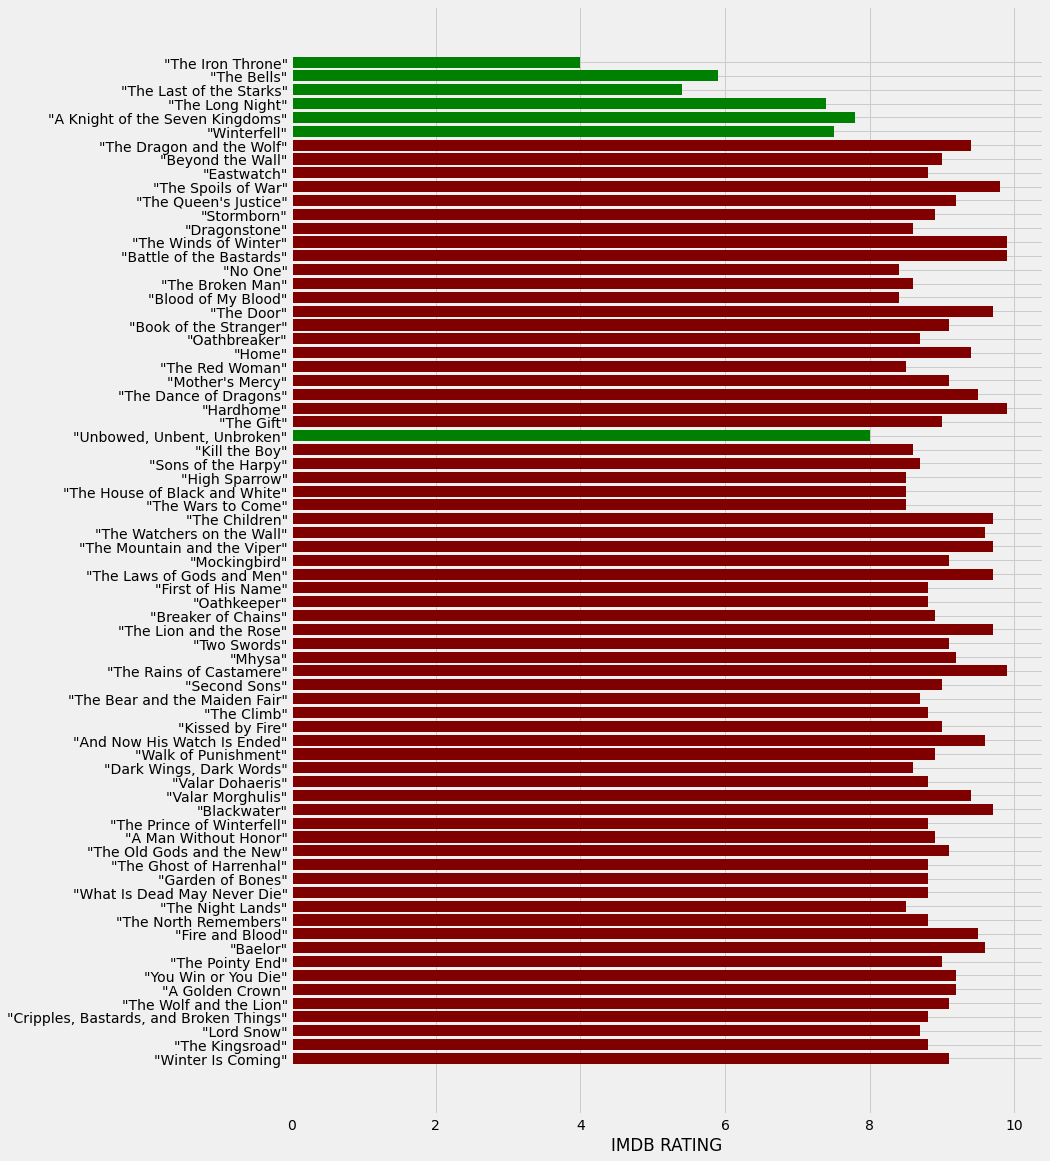

In [41]:
#Imdb rating <=8
plt.gcf().set_size_inches(12,19)
plt.barh(df['Title'],df['Imdb rating'],color=(df['Imdb rating']<=8).map({True:'green',False:'maroon'}))
plt.xlabel('IMDB RATING')
plt.show()

**2. Unique Directors**

In [42]:
df['Directed by'].unique()

array(['Tim Van Patten', 'Brian Kirk', 'Daniel Minahan', 'Alan Taylor',
       'Alik Sakharov', 'David Petrarca', 'David Nutter', 'Neil Marshall',
       'David Benioff', 'Alex Graves', 'Michelle MacLaren', 'D. B. Weiss',
       'Michael Slovis', 'Mark Mylod', 'Jeremy Podeswa',
       'Miguel Sapochnik', 'Daniel Sackheim', 'Jack Bender',
       'Matt Shakman', 'David Benioff & D. B. Weiss'], dtype=object)

**3. The director who directed the most**

In [43]:

df['Directed by'].max()

'Tim Van Patten'

**4. Unique writters**

In [44]:
df['Written by'].unique()

array(['David Benioff & D. B. Weiss', 'Bryan Cogman',
       'George R. R. Martin', 'Vanessa Taylor', 'Dave Hill'], dtype=object)

**5. Writters who wrote the most**

In [45]:
#Who wrote the most.......
df['Written by'].max()

'Vanessa Taylor'



**6. Unique sources**

In [46]:
df['Novel(s) adapted'].unique()

array(['A Game of Thrones', 'A Clash of Kings', 'A Storm of Swords',
       'A Feast for Crows, A Dance with Dragons and original content',
       'Outline from The Winds of Winter and original content ',
       'Outline from A Dream of Spring and original content '],
      dtype=object)

**7. The famous novel among the writters**

In [47]:
df['Novel(s) adapted'].max()

'Outline from The Winds of Winter and original content '

In [48]:
df.head()

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1


**8. Plotting the graph based on the views achieved by the show**

<BarContainer object of 73 artists>

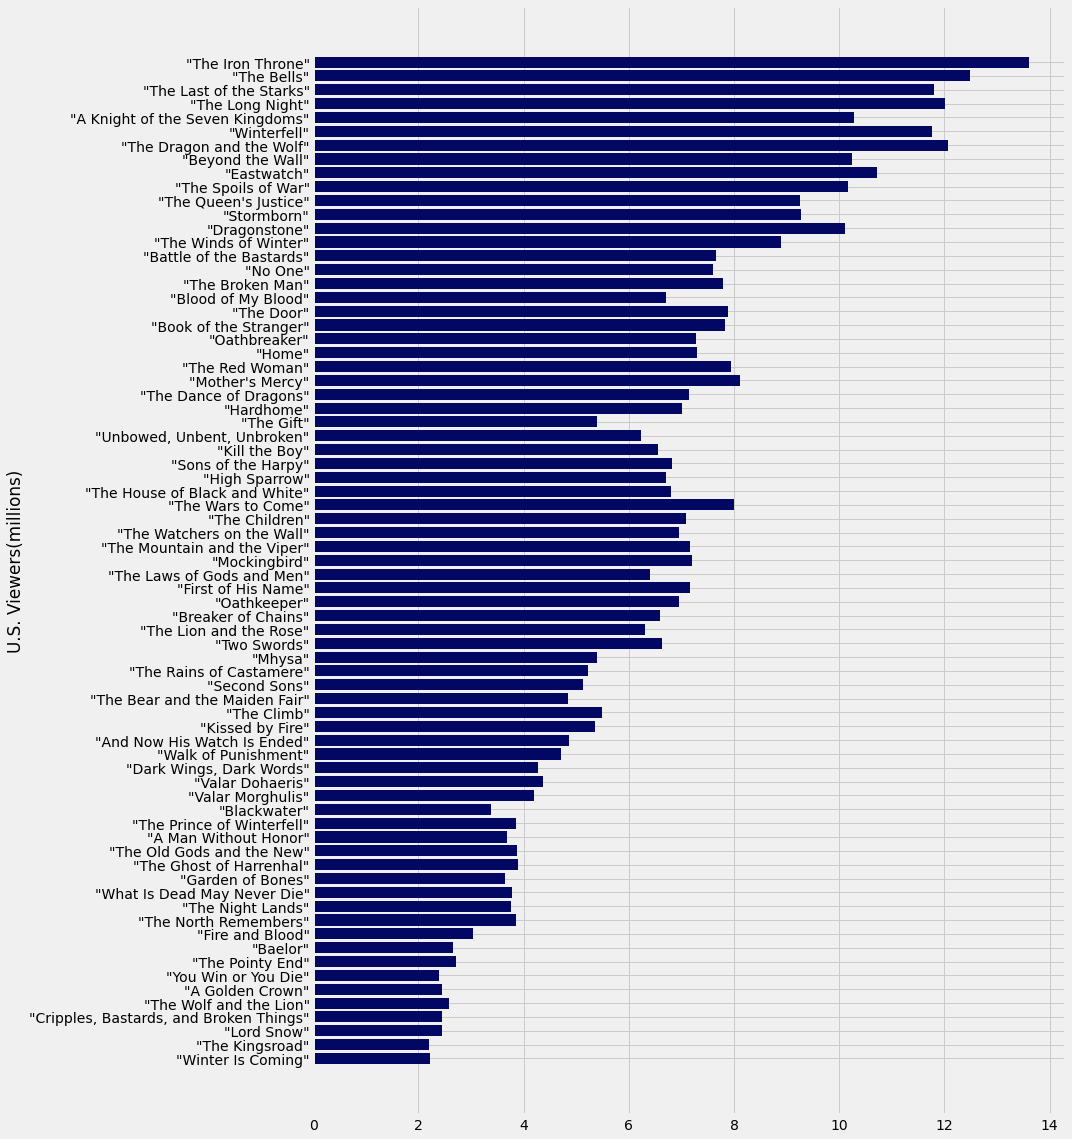

In [49]:
plt.gcf().set_size_inches(12,19)
plt.ylabel("U.S. Viewers(millions)")
plt.barh(df['Title'],df['U.S. viewers(millions)'].values,color='#030764')

**From this graph and from the previous graph we observe that the title which has max viewers has the min IMDB rating....**

*****************************
##   Prediction Model Creation




**Finding out the correlation among the attributes**

In [50]:
df.corr()

,No. overall,No. in season,Season,U.S. viewers(millions),Imdb rating
No. overall,1.000000,-0.033637,0.990319,0.953693,-0.360508
No. in season,-0.033637,1.000000,-0.168137,-0.109026,0.289966
Season,0.990319,-0.168137,1.000000,0.959563,-0.416212
U.S. viewers(millions),0.953693,-0.109026,0.959563,1.000000,-0.471558
Imdb rating,-0.360508,0.289966,-0.416212,-0.471558,1.000000


In [51]:
x = df[['U.S. viewers(millions)','Season']]

In [52]:
y = df['Imdb rating']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (54, 2)
X_test: (19, 2)
y_train: (54,)
y_test: (19,)


### Simple Linear Regression


In [60]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regr.predict(X_test)
y_pred

array([8.62943022, 8.9327866 , 9.13138591, 8.98967765, 8.99175512,
       9.09787452, 8.26606659, 8.89927521, 8.67235819, 9.245168  ,
       9.02039642, 9.24276695, 8.66014899, 8.51564812, 8.73100312,
       8.47934412, 9.01688866, 8.07616871, 8.93837183])

In [62]:
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

R2-Score: 0.21181232964396102


In [91]:
regr.score(X_test,y_test)

0.21181232964396102

## DecisionTreeRegressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [127]:
y_pred = dtr.predict(X_test)
y_pred

[9.7 9.7 9.6 8.5 9.  9.6 7.5 9.7 9.7 9.6 8.5 8.5 9.7 9.8 9.6 9.8 9.  7.4
 9.7]


In [124]:
dtr.score(X_test,y_test)

0.13479232728595936

### Random Forest Regression 


In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
y_pred = rfr.predict(X_test)
y_pred

array([9.621  , 9.609  , 9.342  , 8.856  , 9.042  , 9.36   , 7.489  ,
       9.609  , 9.534  , 9.37675, 8.648  , 8.649  , 9.594  , 9.436  ,
       9.652  , 9.356  , 9.078  , 7.453  , 9.609  ])

In [69]:
rfr.score(X_test,y_test)

0.2856735049968796

### Lasso Regression


In [70]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [71]:
y_pred = lasso.predict(X_test)
y_pred

array([8.74832365, 8.77769112, 9.09161926, 8.87895826, 9.04098569,
       9.0794672 , 8.3746479 , 8.76553906, 8.84452744, 9.29415354,
       8.89009765, 8.89009765, 8.75946304, 8.54578937, 8.86579353,
       8.53262464, 9.05009973, 8.30578624, 8.77971646])

In [72]:
lasso.score(X_test,y_test)

0.17559486810554192

### Ridge Regression



In [73]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [74]:
y_pred = ridge.predict(X_test)
y_pred

array([8.63044222, 8.93124074, 9.13108422, 8.9886005 , 8.99226318,
       9.09776717, 8.26678992, 8.89792369, 8.67391988, 9.24580374,
       9.01914113, 9.23942344, 8.66098285, 8.51572271, 8.73222471,
       8.47962924, 9.01725097, 8.07799331, 8.93679358])

In [75]:
ridge.score(X_test,y_test)

0.2117858583721689

### XgBoost Regressor 


In [76]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
y_pred = xgb.predict(X_test)
y_pred

array([9.702103 , 9.702103 , 9.597352 , 8.502354 , 9.002547 , 9.597352 ,
       7.499098 , 9.702103 , 9.696589 , 9.598017 , 8.63513  , 8.63513  ,
       9.702103 , 9.797604 , 9.600037 , 9.469311 , 9.002547 , 7.6622415,
       9.702103 ], dtype=float32)

In [79]:
xgb.score(X_test,y_test)

0.11073566719178629

### MLP Regressor 


In [80]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [81]:
y_pred = mlp.predict(X_test)
y_pred

array([ 9.53603852,  9.01625318,  6.4189108 ,  8.1853733 ,  6.94242445,
        6.54455408, 12.75112701,  9.14189646,  8.75751   ,  4.75012645,
        8.0702003 ,  7.90632544,  9.42086551, 11.19779829,  8.53763426,
       11.33391184,  6.84819199, 13.46347479,  8.99531264])

In [82]:
mlp.score(X_test,y_test)

-7.299425098513062

### Gradient Boosting Regressor 


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [84]:
y_pred = gb.predict(X_test)
y_pred

array([9.79663613, 9.74511826, 9.41587984, 8.529248  , 9.16618899,
       9.41587984, 7.48668904, 9.74511826, 9.60827394, 9.50914935,
       8.529248  , 8.529248  , 9.79663613, 9.59786326, 9.5734483 ,
       9.08460051, 9.16618899, 7.82258323, 9.74511826])

In [85]:
gb.score(X_test,y_test)

0.1407165295076901

### Support Vector Machine Regressor 


In [86]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [87]:
y_pred =svm.predict(X_test)
y_pred

array([9.74835726, 9.45069726, 8.91257001, 9.37269635, 9.01657341,
       8.93561781, 7.68453853, 9.47558643, 9.56549409, 9.00195208,
       9.33451233, 9.14632573, 9.72477304, 8.89169484, 9.49998096,
       8.84790288, 8.99637007, 7.46710186, 9.44633531])

In [88]:
svm.score(X_test,y_test)

0.2536772890346003

********************************
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|0.21|
|Decision Tree Regressor|0.13|
|Random Forest Regressor|0.29|
|Lasso Regression|0.18|
|Ridge Regression|0.21|
|XgBoost Regressor|0.21|
|MLP Regressor|-7.07|
|Gradient Boosting Regressor|0.14|
|Support Vector Regressor|0.25|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Random Forest Regressor is having the upper hand in case of this dataset and after this, we can use Support Vector Machine Regressor which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Random Forest Regressor
2. Support Vector Machine Regression
3. Linear Regression
4. XgBoost
5. Ridge
6. Lasso
7. Gradient Boosting
8. Decision Tree Regression
9. MLP regressor


Hooray!! The models are deployed successfully!

## Thank you!